In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.shape

(891, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df.drop(columns=['deck'], inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_23768\4163740126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23768\4163740126.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [9]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [10]:
df['age'] = df['age'].fillna(df['age'].median())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

In [11]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [12]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

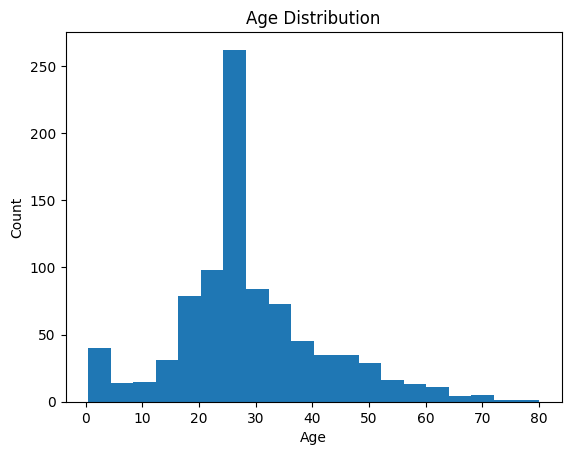

In [13]:
plt.hist(df['age'], bins=20)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

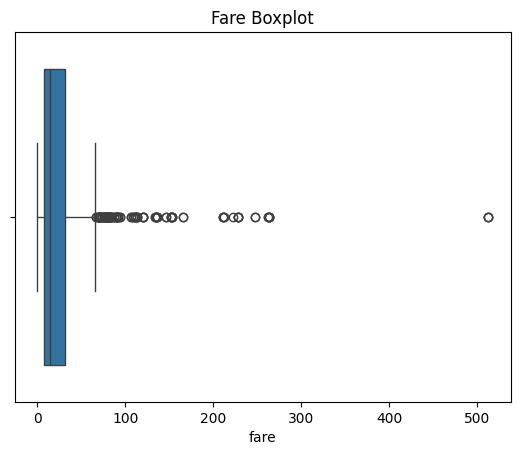

In [14]:
sns.boxplot(x=df['fare'])
plt.title("Fare Boxplot")
plt.show()

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Third'

<Figure size 800x600 with 0 Axes>

In [16]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [23]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

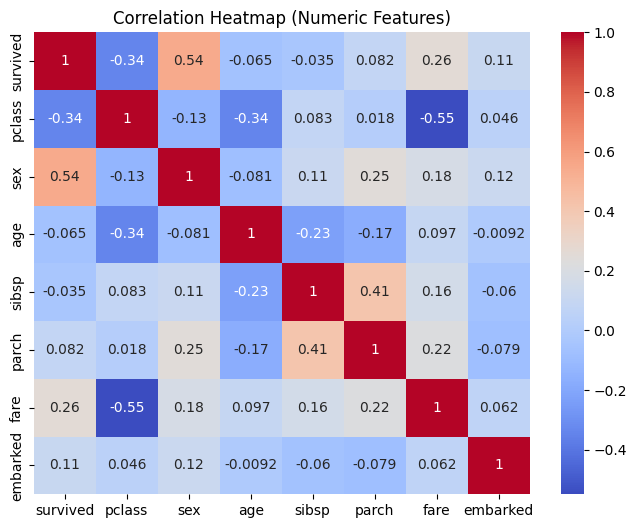

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [ ]:
#  NEW FEATURES ADDING

In [21]:
df['fare_per_person'] = df['fare'] / df['family_size']

In [24]:
df['is_alone'] = (df['family_size'] == 1).astype(int)

In [25]:
df[['family_size', 'is_alone', 'fare_per_person']].head()

,family_size,is_alone,fare_per_person
0,2,0,3.62500
1,2,0,35.64165
2,1,1,7.92500
3,2,0,26.55000
4,1,1,8.05000


In [ ]:
#  Task 2: Machine Learning Model Development

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
features = [
    'pclass',
    'sex',
    'age',
    'fare_per_person',
    'family_size',
    'is_alone',
    'embarked'
]

X = df[features]
y = df['survived']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [29]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [30]:
y_pred = log_model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7932960893854749

In [32]:
confusion_matrix(y_test, y_pred)

array([[94, 16],
       [21, 48]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       110
           1       0.75      0.70      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [34]:
importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': log_model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

importance

,Feature,Coefficient
1,sex,2.510649
6,embarked,0.338334
3,fare_per_person,0.002420
2,age,-0.036573
4,family_size,-0.286195
5,is_alone,-0.613526
0,pclass,-1.058145


In [ ]:
# Logistic Regression Results
# The logistic regression model achieved good accuracy in predicting passenger survival. 
# Features such as sex, passenger class, and fare per person had a strong influence on survival probability.

In [35]:
# DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

dt_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [38]:
dt_pred = dt_model.predict(X_test)

In [39]:
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_accuracy

0.770949720670391

In [40]:
confusion_matrix(y_test, dt_pred)

array([[97, 13],
       [28, 41]])

In [41]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       110
           1       0.76      0.59      0.67        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.76       179



In [42]:
dt_importance = pd.DataFrame({
    'Feature': features,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

dt_importance

,Feature,Importance
1,sex,0.520661
0,pclass,0.150478
2,age,0.130034
3,fare_per_person,0.124477
4,family_size,0.057202
6,embarked,0.017147
5,is_alone,0.000000


In [43]:
# Decision Tree Results
# The Decision Tree model was able to capture non-linear relationships in the data.
# Passenger class and gender were among the most important features influencing survival.
# However, compared to logistic regression, the model showed signs of slight overfitting.

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42
)

rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
rf_pred = rf_model.predict(X_test)

In [68]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy

0.8156424581005587

In [69]:
confusion_matrix(y_test, rf_pred)

array([[97, 13],
       [20, 49]])

In [70]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [71]:
rf_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

rf_importance

,Feature,Importance
3,fare_per_person,0.281155
1,sex,0.265125
2,age,0.252662
0,pclass,0.083887
4,family_size,0.064834
6,embarked,0.036138
5,is_alone,0.016199


In [72]:
# Random Forest Results
# The Random Forest model achieved the highest accuracy among all tested models.
# By combining multiple decision trees, it reduced overfitting and captured complex patterns.
# Gender, passenger class, and fare-related features were the most influential factors in survival prediction.

In [73]:
model_comparison = pd.DataFrame({
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest"
    ],
    "Accuracy": [
        accuracy,
        dt_accuracy,
        rf_accuracy
    ]
})

model_comparison

,Model,Accuracy
0,Logistic Regression,0.793296
1,Decision Tree,0.770950
2,Random Forest,0.815642


In [74]:
model_comparison.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.815642
0,Logistic Regression,0.793296
1,Decision Tree,0.770950


In [75]:
# Model Comparison Summary
# Three different classification models were trained and evaluated for survival prediction.
# Among them, the Random Forest model achieved the highest accuracy, followed by Logistic Regression.
# Decision Tree showed reasonable performance but was slightly prone to overfitting.
# Therefore, Random Forest was selected as the final model for deployment.

In [76]:
# BONUS

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 5]
}

In [79]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [80]:
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 7, ...], 'min_samples_split': [2, 5], 'n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [81]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

In [82]:
best_rf = grid_search.best_estimator_

In [83]:
best_rf_pred = best_rf.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_pred)

best_rf_accuracy

0.7932960893854749

In [85]:
#Although increasing the maximum depth of the Random Forest improved accuracy on a single test split,
#the tuned model selected by GridSearchCV showed slightly lower accuracy. This is because GridSearchCV optimizes 
#for better generalization across multiple cross-validation folds, reducing overfitting and improving model robustness.

In [86]:
import joblib

joblib.dump(best_rf, "titanic_survival_model.pkl")

['titanic_survival_model.pkl']